# Etape 1 : Nettoyage des données

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import missingno as msno
from scipy.stats import pointbiserialr

In [27]:
raw_data = pd.read_csv('data.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## I) Nettoyage et transformation des données 

##### Notre dataset a 7 colonnes de 1338 lignes non nulles avec 4 variables de type numériques et 3 de types object. On va par la suite regarder explicitement notre dataset et transformer, supprimer si nécessairement des éléments aberrants ou non pertinents.

In [28]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
raw_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

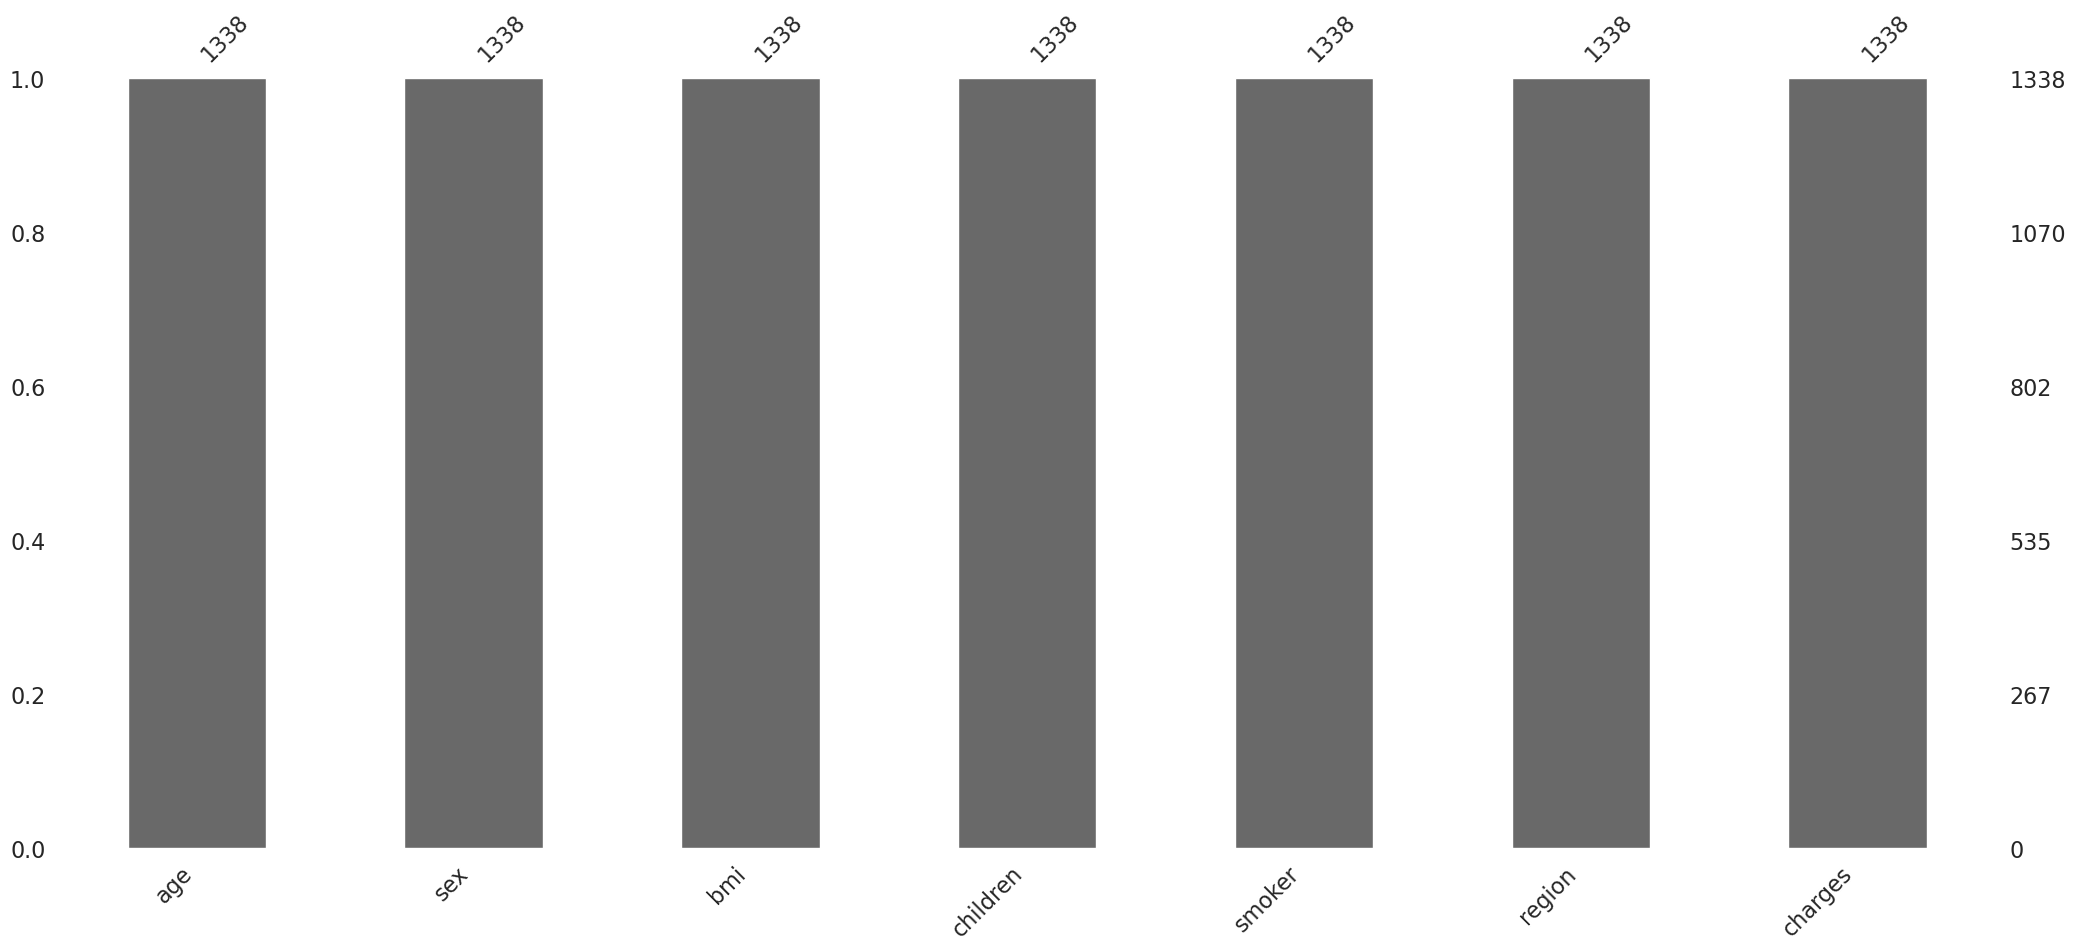

In [30]:
msno.bar(raw_data)

##### On remarque jusqu'à maintenant qu'il n'y a aucune valeurs manquante et aucune valeurs nulles dans notre dataset, ici l'axe de Y correspond à un pourcentage plus nos valeurs de 1 plus elles sont complètes (100%).

In [31]:
raw_data[raw_data.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [32]:
raw_data = raw_data.drop_duplicates()
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### On a enlevé une ligne qui a été dupliqué dans notre dataset donc on passe à 1337 lignes, une ligne correspond à environ 0.07% de notre de dataset. On enlève au cas où il y aurait un impact plus tard mais vu la taille de notre jeu de données ça ne devrait pas poser de problème qu'elle soit présente ou non.

In [33]:
raw_data.bmi = raw_data.bmi.round(2)
raw_data.charges = raw_data.charges.round(2)

## II) Analyse de données

## 1.Distribution et répartition

#### On liste notre jeu de données pour regarder la pertinence de nos paramètres et par la suite observer si il y'a des valeurs aberrantes qu'on pourrait enlever.

In [34]:
raw_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663628,1.095737,13279.121503
std,14.044333,6.100233,1.205571,12110.359677
min,18.000000,15.960000,0.000000,1121.870000
25%,27.000000,26.290000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.130000,5.000000,63770.430000


In [35]:
raw_data[raw_data['bmi'] > 30]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
6,46,female,33.44,1,no,southeast,8240.59
12,23,male,34.40,0,no,southwest,1826.84
13,56,female,39.82,0,no,southeast,11090.72
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.94
1332,52,female,44.70,3,no,southwest,11411.68
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98


##### On a remarqué plus haut que que la valeur max du bmi est de 53 et on sait que si une personne a un bmi supérieur à 30 il est en obésité morbide donc je regarde si il y'a plusieurs dans ce cas précis.

#### Pour avoir une meilleure compréhension de notre jeu de donnée, nous allons regarder la répartitions de nos variables avec des histogrammes.

In [36]:
# raw_data.charges = np.log(raw_data.charges)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

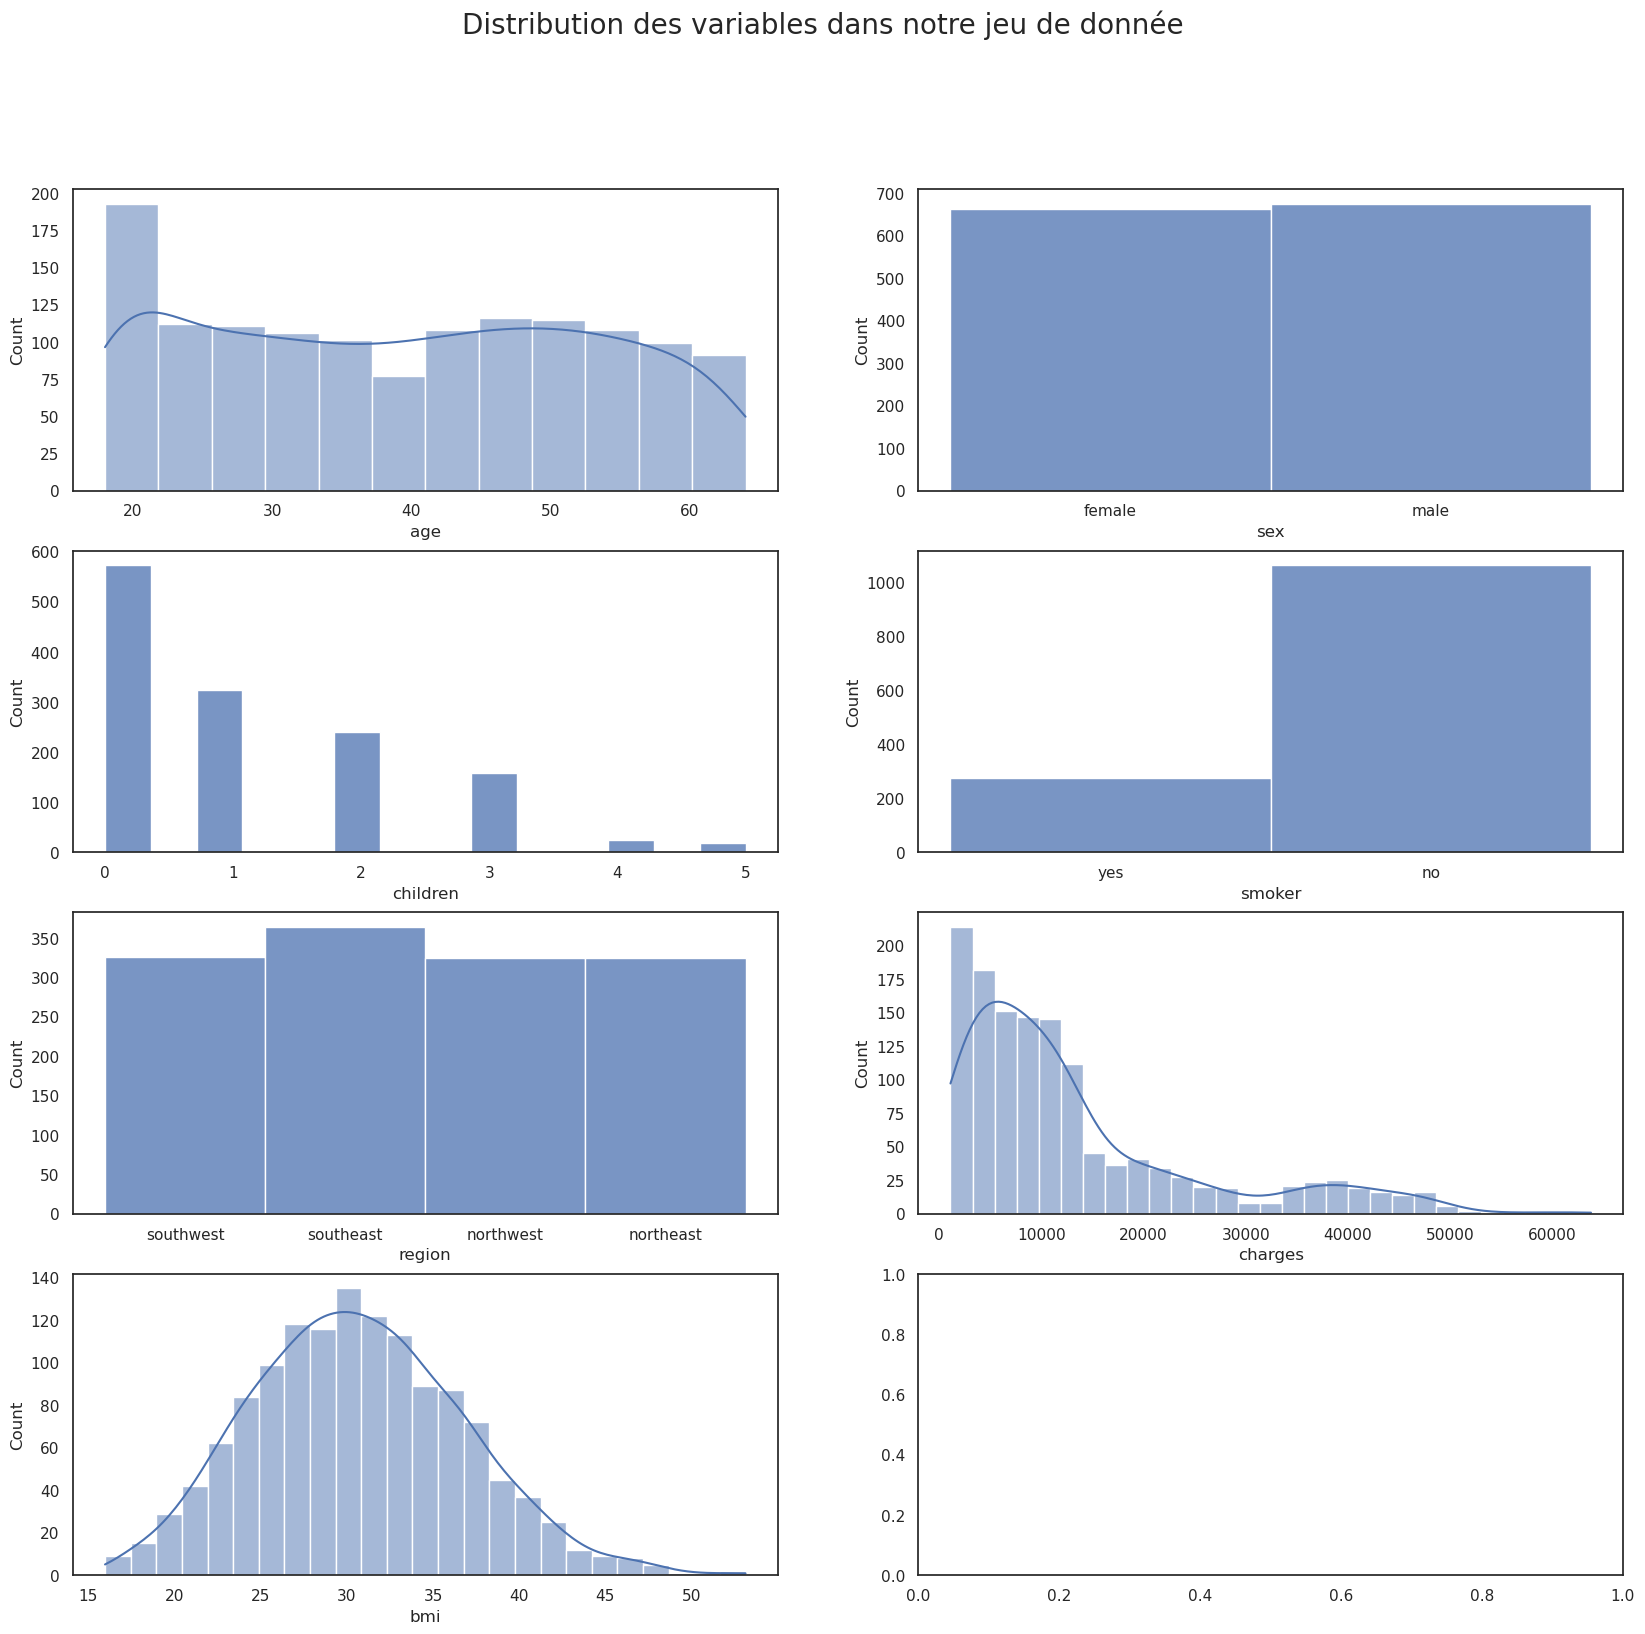

In [37]:
fig, ax =plt.subplots(4,2,figsize=(20,18))
plt.suptitle("Distribution des variables dans notre jeu de donnée",fontsize =20)
sns.histplot(ax=ax[0,0],x="age",data=raw_data,kde=True)
sns.histplot(ax=ax[0,1],x="sex",data=raw_data)
sns.histplot(ax=ax[1,0],x="children",data=raw_data)
sns.histplot(ax=ax[1,1],x="smoker",data=raw_data)
sns.histplot(ax=ax[2,0],x="region",data=raw_data)
sns.histplot(ax=ax[2,1],x="charges",data=raw_data,kde=True)
sns.histplot(ax=ax[3,0],x="bmi",data=raw_data,kde=True)



## 2.Corrélation avec la variable cible (charges)

#### Nous allons regarder la corrélation de notre dataset avec notre variable cible. Avant cela nous allons résumer la catégorie associé a chaque variables. Il y'a 2 variables quantitatives : âge,bmi et 3 variables qualitatives (catégorielle) : region,smoker,sexe,children.

### 2.1 Variables quantitatives

In [38]:
# liste = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
# for index in raw_data:
#     if index in liste:
#         print("price / " + index)
#         plt.plot(raw_data[index], raw_data['charges'], 'rx', markersize=4)
#         plt.show()

<AxesSubplot:>

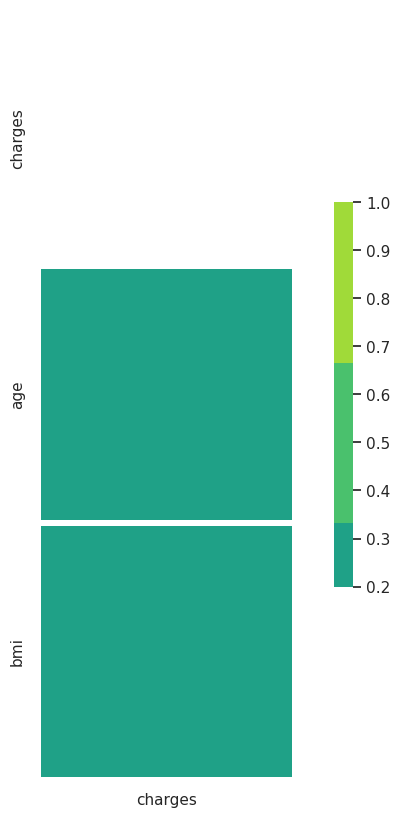

In [39]:
sns.set_theme(style="white")
corr = raw_data[['charges','age', 'bmi']].corr()[["charges"]]
mask = np.triu(corr)
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette("viridis")

sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )

In [40]:
raw_data[['charges','age', 'bmi']].corr()['charges'].sort_values(ascending=False).to_frame()

,charges
charges,1.000000
age,0.298308
bmi,0.198391


### 2.2 Variables catégorielles

##### Pour les variables catégiorelles , il est nécessaire d'utiliser différentes méthodes car on ne peut pas trouver la correlation entre une variable catégorielle et quantitatif aussi facilement. Pour le sexe et smoker qui sont des des variables binaires on peut utiliser une libraire biserial qui va nous permettre de la calculer , il faut pour cela au préalable les transformer en 0 ou 1. Pour région et children nous devons utiliser un test statistique ANOVA pour déterminer une p-value qui va valider de manière assez large/vague la correlation de nos variables.

In [41]:
from scipy.stats import pointbiserialr,f_oneway

categ = raw_data
region = categ.region.unique()
reg_dict = dict(zip(region,range(len(region))))
sexe = categ.sex.unique()
sex_dict = dict(zip(sexe,range(len(sexe))))
smoke =  categ.smoker.unique()
smok_dict = dict(zip(smoke,range(len(smoke))))

for k,v in reg_dict.items():
    categ.region = categ.region.replace(k,v,regex=False)
for k,v in sex_dict.items():
    categ.sex = categ.sex.replace(k,v,regex=False)
for k,v in smok_dict.items():
    categ.smoker = categ.smoker.replace(k,v,regex=False)    

In [50]:
categ

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,0,0,16884.92
1,18,1,33.77,1,1,1,1725.55
2,28,1,33.00,3,1,1,4449.46
3,33,1,22.70,0,1,2,21984.47
4,32,1,28.88,0,1,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,30.97,3,1,2,10600.55
1334,18,0,31.92,0,1,3,2205.98
1335,18,0,36.85,0,1,1,1629.83
1336,21,0,25.80,0,1,0,2007.94


In [51]:
sex_corr = pointbiserialr(categ.sex,categ.charges)
sex_corr

PointbiserialrResult(correlation=0.05804450751626765, pvalue=0.03382075594787254)

In [52]:
smok_corr = pointbiserialr(categ.smoker,categ.charges)
smok_corr

PointbiserialrResult(correlation=-0.7872343680344993, pvalue=1.4067191603310411e-282)

In [53]:
reg_corr = f_oneway(categ.region,categ.charges)
reg_corr

F_onewayResult(statistic=1607.1593549826453, pvalue=1.4436480177348129e-275)

In [54]:
child_corr = f_oneway(categ.children,categ.charges)
child_corr

F_onewayResult(statistic=1607.2533270278946, pvalue=1.4018829076217208e-275)

##### Pour le sexe et la catégorie fumeur ont une p-value inférieur à 0.05 cela signifie que la différence entre les charges et ces catégories sont statistiquement significatives et qu'elle rejetent l'hypothèse nulle selon laquelle elles n'auraient pas d'influence. Cependant la correlation avec le sexe est faible et celle de smoker est négative cela veut dire qu'elle a impact fort sur les charges. On a également des p-values inférieur à 0.05 pour les region et children ce qui indiquent également que l'hypothèse selon laquelle elle n'auraient pas d'infulence est nulle.

## 3.Correlation bivariée

In [ ]:
blabla

# III) Modélisation

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor


In [56]:
X = raw_data.drop('charges', axis=1)
y = raw_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)
dummy = DummyRegressor()
X_train.head()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.008391983483461818